Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [ ]:
!pip install scikit-learn==1.3.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 21.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
pip install --upgrade scikit-learn==1.3.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 37.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.0
    Uninstalling scikit-learn-1.3.0:
      Successfully uninstalled scikit-learn-1.3.0


In [ ]:
!pip install --upgrade pip
!pip install tensorflow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.6 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


Data Collection & Analysis

In [ ]:
# loading the data from csv file to a Pandas DataFrame
parkinsons_data = pd.read_csv('/content/Parkinson.csv')

In [ ]:
# printing the first 5 rows of the dataframe
parkinsons_data

,Fo,Fhi,Flo,RAP,PPQ,DDP,Shimmer,Shimmer_dB,Shimmer_APQ3,Shimmer_APQ5,APQ,Shimmer_DDA,NHR,HNR,RPDE,DFA,status
0,119.992,157.302,74.997,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,1
1,122.400,148.650,113.819,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,1
2,116.682,131.111,111.555,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,1
3,116.676,137.871,111.366,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,1
4,116.014,141.781,110.655,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00263,0.00259,0.00790,0.04087,0.405,0.02336,0.02498,0.02745,0.07008,0.02764,19.517,0.448439,0.657899,0
191,209.516,253.017,89.488,0.00331,0.00292,0.00994,0.02751,0.263,0.01604,0.01657,0.01879,0.04812,0.01810,19.147,0.431674,0.683244,0
192,174.688,240.005,74.287,0.00624,0.00564,0.01873,0.02308,0.256,0.01268,0.01365,0.01667,0.03804,0.10715,17.883,0.407567,0.655683,0
193,198.764,396.961,74.904,0.00370,0.00390,0.01109,0.02296,0.241,0.01265,0.01321,0.01588,0.03794,0.07223,19.020,0.451221,0.643956,0


In [ ]:
# number of rows and columns in the dataframe
parkinsons_data.shape

(195, 17)

In [ ]:
parkinsons_data.describe()

,Fo,Fhi,Flo,RAP,PPQ,DDP,Shimmer,Shimmer_dB,Shimmer_APQ3,Shimmer_APQ5,APQ,Shimmer_DDA,NHR,HNR,RPDE,DFA,status
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.003306,0.003446,0.009920,0.029709,0.282251,0.015664,0.017878,0.024081,0.046993,0.024847,21.885974,0.498536,0.718099,0.753846
std,41.390065,91.491548,43.521413,0.002968,0.002759,0.008903,0.018857,0.194877,0.010153,0.012024,0.016947,0.030459,0.040418,4.425764,0.103942,0.055336,0.431878
min,88.333000,102.145000,65.476000,0.000680,0.000920,0.002040,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650,8.441000,0.256570,0.574282,0.000000
25%,117.572000,134.862500,84.291000,0.001660,0.001860,0.004985,0.016505,0.148500,0.008245,0.009580,0.013080,0.024735,0.005925,19.198000,0.421306,0.674758,1.000000
50%,148.790000,175.829000,104.315000,0.002500,0.002690,0.007490,0.022970,0.221000,0.012790,0.013470,0.018260,0.038360,0.011660,22.085000,0.495954,0.722254,1.000000
75%,182.769000,224.205500,140.018500,0.003835,0.003955,0.011505,0.037885,0.350000,0.020265,0.022380,0.029400,0.060795,0.025640,25.075500,0.587562,0.761881,1.000000
max,260.105000,592.030000,239.170000,0.021440,0.019580,0.064330,0.119080,1.302000,0.056470,0.079400,0.137780,0.169420,0.314820,33.047000,0.685151,0.825288,1.000000


In [ ]:
# getting more information about the dataset
parkinsons_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Fo            195 non-null    float64
 1   Fhi           195 non-null    float64
 2   Flo           195 non-null    float64
 3   RAP           195 non-null    float64
 4   PPQ           195 non-null    float64
 5   DDP           195 non-null    float64
 6   Shimmer       195 non-null    float64
 7   Shimmer_dB    195 non-null    float64
 8   Shimmer_APQ3  195 non-null    float64
 9   Shimmer_APQ5  195 non-null    float64
 10  APQ           195 non-null    float64
 11  Shimmer_DDA   195 non-null    float64
 12  NHR           195 non-null    float64
 13  HNR           195 non-null    float64
 14  RPDE          195 non-null    float64
 15  DFA           195 non-null    float64
 16  status        195 non-null    int64  
dtypes: float64(16), int64(1)
memory usage: 26.0 KB


In [ ]:
# checking for missing values in each column
parkinsons_data.isnull().sum()

Fo              0
Fhi             0
Flo             0
RAP             0
PPQ             0
DDP             0
Shimmer         0
Shimmer_dB      0
Shimmer_APQ3    0
Shimmer_APQ5    0
APQ             0
Shimmer_DDA     0
NHR             0
HNR             0
RPDE            0
DFA             0
status          0
dtype: int64

In [ ]:
# getting some statistical measures about the data
parkinsons_data.describe()

,Fo,Fhi,Flo,RAP,PPQ,DDP,Shimmer,Shimmer_dB,Shimmer_APQ3,Shimmer_APQ5,APQ,Shimmer_DDA,NHR,HNR,RPDE,DFA,status
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.003306,0.003446,0.009920,0.029709,0.282251,0.015664,0.017878,0.024081,0.046993,0.024847,21.885974,0.498536,0.718099,0.753846
std,41.390065,91.491548,43.521413,0.002968,0.002759,0.008903,0.018857,0.194877,0.010153,0.012024,0.016947,0.030459,0.040418,4.425764,0.103942,0.055336,0.431878
min,88.333000,102.145000,65.476000,0.000680,0.000920,0.002040,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650,8.441000,0.256570,0.574282,0.000000
25%,117.572000,134.862500,84.291000,0.001660,0.001860,0.004985,0.016505,0.148500,0.008245,0.009580,0.013080,0.024735,0.005925,19.198000,0.421306,0.674758,1.000000
50%,148.790000,175.829000,104.315000,0.002500,0.002690,0.007490,0.022970,0.221000,0.012790,0.013470,0.018260,0.038360,0.011660,22.085000,0.495954,0.722254,1.000000
75%,182.769000,224.205500,140.018500,0.003835,0.003955,0.011505,0.037885,0.350000,0.020265,0.022380,0.029400,0.060795,0.025640,25.075500,0.587562,0.761881,1.000000
max,260.105000,592.030000,239.170000,0.021440,0.019580,0.064330,0.119080,1.302000,0.056470,0.079400,0.137780,0.169420,0.314820,33.047000,0.685151,0.825288,1.000000


# distribution of target Variable
parkinsons_data[''].value_counts()

1  --> Parkinson's Positive

0 --> Healthy


In [ ]:
# grouping the data bas3ed on the target variable
parkinsons_data.groupby('status').mean()

,Fo,Fhi,Flo,RAP,PPQ,DDP,Shimmer,Shimmer_dB,Shimmer_APQ3,Shimmer_APQ5,APQ,Shimmer_DDA,NHR,HNR,RPDE,DFA
status,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.001925,0.002056,0.005776,0.017615,0.162958,0.009504,0.010509,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716
1,145.180762,188.441463,106.893558,0.003757,0.003900,0.011273,0.033658,0.321204,0.017676,0.020285,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408


Data Pre-Processing

Separating the features & Target

In [ ]:
X = parkinsons_data.drop(columns=['status'], axis=1)
Y = parkinsons_data['status']

In [ ]:
X[0:1]

,Fo,Fhi,Flo,RAP,PPQ,DDP,Shimmer,Shimmer_dB,Shimmer_APQ3,Shimmer_APQ5,APQ,Shimmer_DDA,NHR,HNR,RPDE,DFA
0,119.992,157.302,74.997,0.0037,0.00554,0.01109,0.04374,0.426,0.02182,0.0313,0.02971,0.06545,0.02211,21.033,0.414783,0.815285


In [ ]:
X

,Fo,Fhi,Flo,RAP,PPQ,DDP,Shimmer,Shimmer_dB,Shimmer_APQ3,Shimmer_APQ5,APQ,Shimmer_DDA,NHR,HNR,RPDE,DFA
0,119.992,157.302,74.997,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,0.414783,0.815285
1,122.400,148.650,113.819,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,0.458359,0.819521
2,116.682,131.111,111.555,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,0.429895,0.825288
3,116.676,137.871,111.366,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,0.434969,0.819235
4,116.014,141.781,110.655,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,0.417356,0.823484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00263,0.00259,0.00790,0.04087,0.405,0.02336,0.02498,0.02745,0.07008,0.02764,19.517,0.448439,0.657899
191,209.516,253.017,89.488,0.00331,0.00292,0.00994,0.02751,0.263,0.01604,0.01657,0.01879,0.04812,0.01810,19.147,0.431674,0.683244
192,174.688,240.005,74.287,0.00624,0.00564,0.01873,0.02308,0.256,0.01268,0.01365,0.01667,0.03804,0.10715,17.883,0.407567,0.655683
193,198.764,396.961,74.904,0.00370,0.00390,0.01109,0.02296,0.241,0.01265,0.01321,0.01588,0.03794,0.07223,19.020,0.451221,0.643956


In [ ]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64

Splitting the data to training data & Test data

In [ ]:
from sklearn.model_selection import train_test_split
# Split the data into training and combined validation/testing sets (80% train, 20% val/test)
X_train, X_val_test, Y_train, Y_val_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)
# Split the combined validation/testing set into validation and testing sets (50% val, 50% test)
X_validation, X_test, Y_validation, Y_test = train_test_split(X_val_test, Y_val_test, test_size=0.5, stratify=Y_val_test, random_state=2)
# Print the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_validation:", X_validation.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_validation:", Y_validation.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of X_train: (156, 16)
Shape of X_validation: (19, 16)
Shape of X_test: (20, 16)
Shape of Y_train: (156,)
Shape of Y_validation: (19,)
Shape of Y_test: (20,)


Data Standardization

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [ ]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train[0:1]

array([[-0.33778985, -0.18615128, -0.91108592, -0.59057854, -0.505953  ,
        -0.58948848, -0.71555708, -0.66430048, -0.84778441, -0.71606277,
        -0.37370657, -0.84781829, -0.36304232,  0.69884716, -0.67708739,
        -0.97602142]])

In [ ]:
X_train

array([[-0.33778985, -0.18615128, -0.91108592, ...,  0.69884716,
        -0.67708739, -0.97602142],
       [ 1.09942206,  0.25239988,  0.75943197, ..., -0.7164821 ,
         1.04327582, -1.04854884],
       [-0.87522007, -0.56486872, -0.36994789, ...,  0.82603693,
        -1.09406107,  0.62830711],
       ...,
       [ 0.9678342 ,  0.13891462, -0.82445104, ...,  0.02286559,
        -0.018784  ,  0.34614393],
       [-0.76998373, -0.61753724, -0.40869159, ..., -0.07184046,
         0.65832444, -0.89386615],
       [ 1.19847659,  0.49335125,  1.11785168, ..., -0.26399765,
        -0.01950689, -1.60296417]])

Histogram

array([[<Axes: title={'center': 'Fo'}>, <Axes: title={'center': 'Fhi'}>,
        <Axes: title={'center': 'Flo'}>, <Axes: title={'center': 'RAP'}>],
       [<Axes: title={'center': 'PPQ'}>, <Axes: title={'center': 'DDP'}>,
        <Axes: title={'center': 'Shimmer'}>,
        <Axes: title={'center': 'Shimmer_dB'}>],
       [<Axes: title={'center': 'Shimmer_APQ3'}>,
        <Axes: title={'center': 'Shimmer_APQ5'}>,
        <Axes: title={'center': 'APQ'}>,
        <Axes: title={'center': 'Shimmer_DDA'}>],
       [<Axes: title={'center': 'NHR'}>, <Axes: title={'center': 'HNR'}>,
        <Axes: title={'center': 'RPDE'}>,
        <Axes: title={'center': 'DFA'}>],
       [<Axes: title={'center': 'status'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

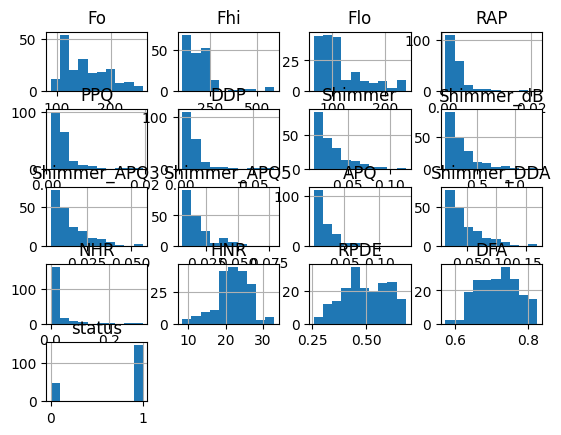

In [ ]:
parkinsons_data.hist()

<Axes: ylabel='Frequency'>

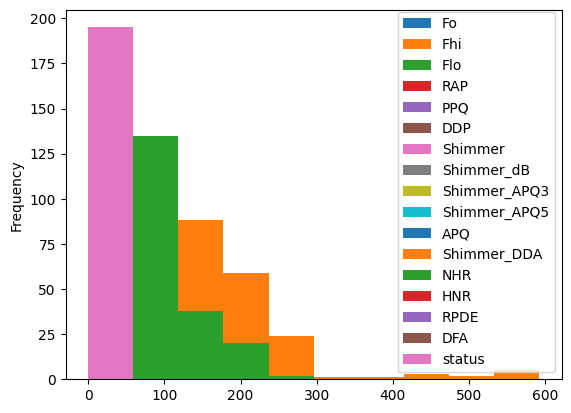

In [ ]:
parkinsons_data.plot(kind='hist')

Scatter plot

<Axes: xlabel='PPQ', ylabel='DDP'>

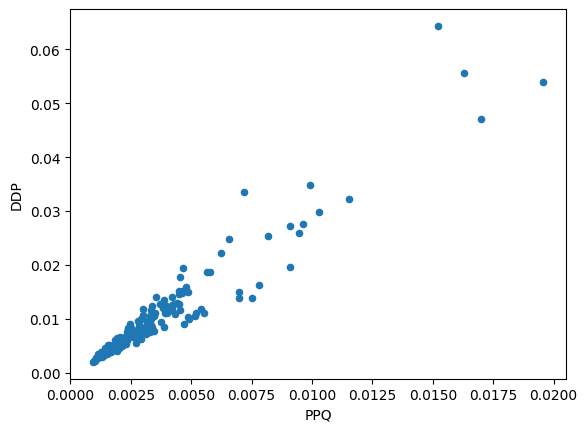

In [ ]:
parkinsons_data.plot(kind='scatter',x='PPQ',y='DDP')

<Axes: xlabel='NHR', ylabel='HNR'>

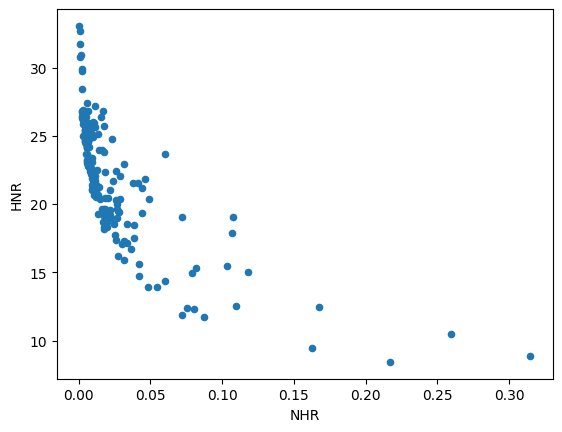

In [ ]:
parkinsons_data.plot(kind='scatter',x='NHR',y='HNR')

Model Training

In [ ]:
import sklearn
print(sklearn.__version__)

1.2.2


Support Vector Machine Model

In [ ]:
# p_model = svm.SVC(kernel='linear')
# # training the SVM model with training data
# p_model.fit(X_train, Y_train)

Logistic Regression

In [ ]:
# from sklearn.linear_model import LogisticRegression
# # Create a Logistic Regression model
# p_model = LogisticRegression()
# # Training the Logistic Regression model with training data
# p_model.fit(X_train, Y_train)

KNeighborsClassifier

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier
# # Create a K-Nearest Neighbors (KNN) classifier model
# p_model = KNeighborsClassifier(n_neighbors=5)
# # Training the KNN model with training data
# p_model.fit(X_train, Y_train)

CNN

In [ ]:

import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

# Assuming X and Y are your feature and target variables

# Split the data into training and combined validation/testing sets (80% train, 20% val/test)
X_train, X_val_test, Y_train, Y_val_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

# Split the combined validation/testing set into validation and testing sets (50% val, 50% test)
X_validation, X_test, Y_validation, Y_test = train_test_split(X_val_test, Y_val_test, test_size=0.5, stratify=Y_val_test, random_state=2)

# Convert DataFrames to NumPy arrays
X_train_array = X_train.to_numpy()
X_validation_array = X_validation.to_numpy()
X_test_array = X_test.to_numpy()

# Reshape the data to be compatible with CNN
X_train_reshaped = X_train_array.reshape(X_train_array.shape[0], X_train_array.shape[1], 1)
X_validation_reshaped = X_validation_array.reshape(X_validation_array.shape[0], X_validation_array.shape[1], 1)
X_test_reshaped = X_test_array.reshape(X_test_array.shape[0], X_test_array.shape[1], 1)

# Build the CNN model
p_model = models.Sequential()
p_model.add(layers.Conv1D(32, 3, activation='relu', input_shape=(X_train_array.shape[1], 1)))
p_model.add(layers.MaxPooling1D(2))
p_model.add(layers.Flatten())
p_model.add(layers.Dense(64, activation='relu'))
p_model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
p_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
p_model.fit(X_train_reshaped, Y_train, epochs=10, batch_size=32, validation_data=(X_validation_reshaped, Y_validation))


# Train the model
p_model.fit(X_train_reshaped, Y_train, epochs=10, batch_size=32, validation_data=(X_validation_reshaped, Y_validation))

# Evaluate the model on the training set
train_loss, train_acc = p_model.evaluate(X_train_reshaped, Y_train)
print(f'Training Accuracy: {train_acc}')

# Evaluate the model on the test set
test_loss, test_acc = p_model.evaluate(X_test_reshaped, Y_test)
print(f'Test Accuracy: {test_acc}')

# Make predictions on the training set
Y_train_predictions = (p_model.predict(X_train_reshaped) > 0.5).astype(int)

# Make predictions on the test set
Y_test_predictions = (p_model.predict(X_test_reshaped) > 0.5).astype(int)
# Calculate evaluation metrics for test data
accuracy_test = accuracy_score(Y_test, Y_test_predictions)
precision_test = precision_score(Y_test, Y_test_predictions)
recall_test = recall_score(Y_test, Y_test_predictions)
f1_test = f1_score(Y_test, Y_test_predictions)
confusion_matrix_test = confusion_matrix(Y_test, Y_test_predictions)
print('Training Accuracy:', accuracy_train)
print('Precision on the training data:', precision_train)
print('Recall on the training data:', recall_train)
print('F1 Score on the training data:', f1_train)
print('Confusion matrix on the training data:')
print(confusion_matrix_train)

print('Test Accuracy:', accuracy_test)
print('Precision on the testing data:', precision_test)
print('Recall on the testing data:', recall_test)
print('F1 Score on the testing data:', f1_test)
print('Confusion matrix on the testing data:')
print(confusion_matrix_test)

print('Validation Accuracy:', accuracy_validation)
print('Precision on the validation data:', precision_validation)
print('Recall on the validation data:', recall_validation)
print('F1 Score on the validation data:', f1_validation)
print('Confusion matrix on the validation data:')
print(confusion_matrix_validation)


Epoch 1/10
5/5 [==============================] - 2s 94ms/step - loss: 1.4797 - accuracy: 0.5705 - val_loss: 2.6877 - val_accuracy: 0.7368
Epoch 2/10
5/5 [==============================] - 0s 16ms/step - loss: 1.3491 - accuracy: 0.7564 - val_loss: 2.1728 - val_accuracy: 0.7368
Epoch 3/10
5/5 [==============================] - 0s 18ms/step - loss: 0.9024 - accuracy: 0.5449 - val_loss: 1.6331 - val_accuracy: 0.4737
Epoch 4/10
5/5 [==============================] - 0s 20ms/step - loss: 0.7843 - accuracy: 0.7372 - val_loss: 1.5124 - val_accuracy: 0.7368
Epoch 5/10
5/5 [==============================] - 0s 19ms/step - loss: 0.7229 - accuracy: 0.6667 - val_loss: 1.0047 - val_accuracy: 0.4737
Epoch 6/10
5/5 [==============================] - 0s 19ms/step - loss: 0.6389 - accuracy: 0.7308 - val_loss: 0.8543 - val_accuracy: 0.7368
Epoch 7/10
5/5 [==============================] - 0s 14ms/step - loss: 0.6647 - accuracy: 0.6218 - val_loss: 0.7039 - val_accuracy: 0.7368
Epoch 8/10
5/5 [===========

NameError: ignored

Model Evaluation

In [ ]:
# Assuming your model is named p_model
threshold = 0.5  # You can adjust this threshold as needed

# Predictions on the training set
X_train_prediction = (p_model.predict(X_train) > threshold).astype(int)
accuracy_train = accuracy_score(Y_train, X_train_prediction)
precision_train = precision_score(Y_train, X_train_prediction)
recall_train = recall_score(Y_train, X_train_prediction)
f1_train = f1_score(Y_train, X_train_prediction)
confusion_matrix_train = confusion_matrix(Y_train, X_train_prediction)

# Predictions on the test set
X_test_prediction = (p_model.predict(X_test) > threshold).astype(int)
accuracy_test = accuracy_score(Y_test, X_test_prediction)
precision_test = precision_score(Y_test, X_test_prediction)
recall_test = recall_score(Y_test, X_test_prediction)
f1_test = f1_score(Y_test, X_test_prediction)
confusion_matrix_test = confusion_matrix(Y_test, X_test_prediction)

# Predictions on the validation set
X_validation_prediction = (p_model.predict(X_validation) > threshold).astype(int)
accuracy_validation = accuracy_score(Y_validation, X_validation_prediction)
precision_validation = precision_score(Y_validation, X_validation_prediction)
recall_validation = recall_score(Y_validation, X_validation_prediction)
f1_validation = f1_score(Y_validation, X_validation_prediction)
confusion_matrix_validation = confusion_matrix(Y_validation, X_validation_prediction)

# Print the metrics
print('Accuracy score on the training data:', accuracy_train)
print('Accuracy score on the testing data:', accuracy_test)
print('Accuracy score on the validation data:', accuracy_validation)

print('Precision score on the training data:', precision_train)
print('Precision score on the testing data:', precision_test)
print('Precision score on the validation data:', precision_validation)

print('Sensitivity (Recall) score on the training data:', recall_train)
print('Sensitivity (Recall) score on the testing data:', recall_test)
print('Sensitivity (Recall) score on the validation data:', recall_validation)

print('F1 score on the training data:', f1_train)
print('F1 score on the testing data:', f1_test)
print('F1 score on the validation data:', f1_validation)

print('Confusion matrix on the training data:')
print(confusion_matrix_train)
print('Confusion matrix on the testing data:')
print(confusion_matrix_test)
print('Confusion matrix on the validation data:')
print(confusion_matrix_validation)


In [ ]:
# from sklearn.model_selection import KFold
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# import numpy as np

# # Example data (replace with your actual data)
# X_combined = np.random.rand(100, 10)  # Replace with your features
# Y_combined = np.random.randint(2, size=100)  # Replace with your labels (binary classification)

# # Lists to store metrics for each fold
# accuracy_scores = []
# precision_scores = []
# recall_scores = []
# f1_scores = []
# confusion_matrices = []

# # Create a linear SVM model
# h_model = SVC(kernel='linear')

# # Perform K-fold cross-validation and calculate metrics for each fold
# kf = KFold(n_splits=5, shuffle=True, random_state=42)  # Adjust the number of splits as needed
# for i, (train_index, test_index) in enumerate(kf.split(X_combined)):
#     X_train_fold, X_test_fold = X_combined[train_index], X_combined[test_index]
#     Y_train_fold, Y_test_fold = Y_combined[train_index], Y_combined[test_index]

#     # Train the SVM model
#     h_model.fit(X_train_fold, Y_train_fold)

#     # Make predictions on the test set
#     Y_pred_fold = h_model.predict(X_test_fold)

#     # Calculate metrics for the fold
#     accuracy_fold = accuracy_score(Y_test_fold, Y_pred_fold)
#     precision_fold = precision_score(Y_test_fold, Y_pred_fold)
#     recall_fold = recall_score(Y_test_fold, Y_pred_fold)
#     f1_fold = f1_score(Y_test_fold, Y_pred_fold)
#     confusion_matrix_fold = confusion_matrix(Y_test_fold, Y_pred_fold)

#     # Print metrics and confusion matrix for each fold
#     print(f"\nMetrics - Fold {i + 1}:")
#     print(f"Accuracy: {accuracy_fold}")
#     print(f"Precision: {precision_fold}")
#     print(f"Recall (Sensitivity): {recall_fold}")
#     print(f"F1 Score: {f1_fold}")
#     print(f"Confusion Matrix:\n{confusion_matrix_fold}")

#     # Append metrics to the respective lists
#     accuracy_scores.append(accuracy_fold)
#     precision_scores.append(precision_fold)
#     recall_scores.append(recall_fold)
#     f1_scores.append(f1_fold)
#     confusion_matrices.append(confusion_matrix_fold)

# # Calculate and print the average metrics across folds
# average_accuracy = np.mean(accuracy_scores)
# average_precision = np.mean(precision_scores)
# average_recall = np.mean(recall_scores)
# average_f1 = np.mean(f1_scores)

# print("\nOverall Metrics:")
# print(f"Average Accuracy: {average_accuracy}")
# print(f"Average Precision: {average_precision}")
# print(f"Average Recall (Sensitivity): {average_recall}")
# print(f"Average F1 Score: {average_f1}")

# # Calculate and print the overall confusion matrix
# overall_confusion_matrix = np.sum(confusion_matrices, axis=0)
# print(f"\nOverall Confusion Matrix:\n{overall_confusion_matrix}")




# import numpy as np
# from sklearn.model_selection import KFold
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# from sklearn.linear_model import LogisticRegression

# # Assuming your data is X_combined and Y_combined
# # Define the number of folds
# num_folds = 5
# kf = KFold(n_splits=num_folds, shuffle=True, random_state=2)

# # Lists to store metrics for each fold
# accuracy_scores_lr = []
# precision_scores_lr = []
# recall_scores_lr = []
# f1_scores_lr = []
# confusion_matrices_lr = []

# # Perform K-fold cross-validation and calculate metrics for each fold for Logistic Regression
# for i, (train_index, test_index) in enumerate(kf.split(X_combined)):
#     X_train_fold, X_test_fold = X_combined[train_index], X_combined[test_index]
#     Y_train_fold, Y_test_fold = Y_combined[train_index], Y_combined[test_index]

#     # Build and train the Logistic Regression model
#     lr_model = LogisticRegression()
#     lr_model.fit(X_train_fold, Y_train_fold)

#     # Make predictions on the test set
#     Y_pred_fold_lr = lr_model.predict(X_test_fold)

#     # Calculate metrics for the fold
#     accuracy_fold_lr = accuracy_score(Y_test_fold, Y_pred_fold_lr)
#     precision_fold_lr = precision_score(Y_test_fold, Y_pred_fold_lr)
#     recall_fold_lr = recall_score(Y_test_fold, Y_pred_fold_lr)
#     f1_fold_lr = f1_score(Y_test_fold, Y_pred_fold_lr)
#     confusion_matrix_fold_lr = confusion_matrix(Y_test_fold, Y_pred_fold_lr)

#     # Print metrics and confusion matrix for each fold for Logistic Regression
#     print(f"\nMetrics (Logistic Regression) - Fold {i + 1}:")
#     print(f"Accuracy: {accuracy_fold_lr}")
#     print(f"Precision: {precision_fold_lr}")
#     print(f"Recall (Sensitivity): {recall_fold_lr}")
#     print(f"F1 Score: {f1_fold_lr}")
#     print(f"Confusion Matrix:\n{confusion_matrix_fold_lr}")

#     # Append metrics to the respective lists for Logistic Regression
#     accuracy_scores_lr.append(accuracy_fold_lr)
#     precision_scores_lr.append(precision_fold_lr)
#     recall_scores_lr.append(recall_fold_lr)
#     f1_scores_lr.append(f1_fold_lr)
#     confusion_matrices_lr.append(confusion_matrix_fold_lr)

# # Calculate and print the average metrics across folds for Logistic Regression
# average_accuracy_lr = np.mean(accuracy_scores_lr)
# average_precision_lr = np.mean(precision_scores_lr)
# average_recall_lr = np.mean(recall_scores_lr)
# average_f1_lr = np.mean(f1_scores_lr)

# print("\nOverall Metrics (Logistic Regression):")
# print(f"Average Accuracy: {average_accuracy_lr}")
# print(f"Average Precision: {average_precision_lr}")
# print(f"Average Recall (Sensitivity): {average_recall_lr}")
# print(f"Average F1 Score: {average_f1_lr}")

# # Calculate and print the overall confusion matrix for Logistic Regression
# overall_confusion_matrix_lr = np.sum(confusion_matrices_lr, axis=0)
# print(f"\nOverall Confusion Matrix (Logistic Regression):\n{overall_confusion_matrix_lr}")
# import numpy as np
# from sklearn.model_selection import KFold
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# from sklearn.neighbors import KNeighborsClassifier

# # Assuming your data is X_combined and Y_combined
# # Define the number of folds
# num_folds = 5
# kf = KFold(n_splits=num_folds, shuffle=True, random_state=2)

# # Lists to store metrics for each fold
# accuracy_scores_knn = []
# precision_scores_knn = []
# recall_scores_knn = []
# f1_scores_knn = []
# confusion_matrices_knn = []

# # Perform K-fold cross-validation and calculate metrics for each fold for KNN
# for i, (train_index, test_index) in enumerate(kf.split(X_combined)):
#     X_train_fold, X_test_fold = X_combined[train_index], X_combined[test_index]
#     Y_train_fold, Y_test_fold = Y_combined[train_index], Y_combined[test_index]

#     # Build and train the KNN model
#     p_model = KNeighborsClassifier(n_neighbors=5)
#     p_model.fit(X_train_fold, Y_train_fold)

#     # Make predictions on the test set
#     Y_pred_fold_knn = p_model.predict(X_test_fold)

#     # Calculate metrics for the fold
#     accuracy_fold_knn = accuracy_score(Y_test_fold, Y_pred_fold_knn)
#     precision_fold_knn = precision_score(Y_test_fold, Y_pred_fold_knn)
#     recall_fold_knn = recall_score(Y_test_fold, Y_pred_fold_knn)
#     f1_fold_knn = f1_score(Y_test_fold, Y_pred_fold_knn)
#     confusion_matrix_fold_knn = confusion_matrix(Y_test_fold, Y_pred_fold_knn)

#     # Print metrics and confusion matrix for each fold for KNN
#     print(f"\nMetrics (KNN) - Fold {i + 1}:")
#     print(f"Accuracy: {accuracy_fold_knn}")
#     print(f"Precision: {precision_fold_knn}")
#     print(f"Recall (Sensitivity): {recall_fold_knn}")
#     print(f"F1 Score: {f1_fold_knn}")
#     print(f"Confusion Matrix:\n{confusion_matrix_fold_knn}")

#     # Append metrics to the respective lists for KNN
#     accuracy_scores_knn.append(accuracy_fold_knn)
#     precision_scores_knn.append(precision_fold_knn)
#     recall_scores_knn.append(recall_fold_knn)
#     f1_scores_knn.append(f1_fold_knn)
#     confusion_matrices_knn.append(confusion_matrix_fold_knn)

# # Calculate and print the average metrics across folds for KNN
# average_accuracy_knn = np.mean(accuracy_scores_knn)
# average_precision_knn = np.mean(precision_scores_knn)
# average_recall_knn = np.mean(recall_scores_knn)
# average_f1_knn = np.mean(f1_scores_knn)

# print("\nOverall Metrics (KNN):")
# print(f"Average Accuracy: {average_accuracy_knn}")
# print(f"Average Precision: {average_precision_knn}")
# print(f"Average Recall (Sensitivity): {average_recall_knn}")
# print(f"Average F1 Score: {average_f1_knn}")

# # Calculate and print the overall confusion matrix for KNN
# overall_confusion_matrix_knn = np.sum(confusion_matrices_knn, axis=0)
# print(f"\nOverall Confusion Matrix (KNN):\n{overall_confusion_matrix_knn}")
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming X and Y are your feature and target variables

# Combine the features and labels
X_combined = np.concatenate((X_train_reshaped, X_validation_reshaped, X_test_reshaped), axis=0)
Y_combined = np.concatenate((Y_train, Y_validation, Y_test), axis=0)

# Define the number of folds
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=2)

# Lists to store metrics for each fold
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
confusion_matrices = []

# Perform K-fold cross-validation and calculate metrics for each fold
for i, (train_index, test_index) in enumerate(kf.split(X_combined)):
    X_train_fold, X_test_fold = X_combined[train_index], X_combined[test_index]
    Y_train_fold, Y_test_fold = Y_combined[train_index], Y_combined[test_index]

    # Build the CNN model
    p_model = models.Sequential()
    p_model.add(layers.Conv1D(32, 3, activation='relu', input_shape=(X_train_fold.shape[1], 1)))
    p_model.add(layers.MaxPooling1D(2))
    p_model.add(layers.Flatten())
    p_model.add(layers.Dense(64, activation='relu'))
    p_model.add(layers.Dense(1, activation='sigmoid'))

    # Compile the model
    p_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    p_model.fit(X_train_fold, Y_train_fold, epochs=10, batch_size=32, verbose=0)

    # Make predictions on the test set
    Y_pred_fold = (p_model.predict(X_test_fold) > 0.5).astype(int)

    # Calculate metrics for the fold
    accuracy_fold = accuracy_score(Y_test_fold, Y_pred_fold)
    precision_fold = precision_score(Y_test_fold, Y_pred_fold)
    recall_fold = recall_score(Y_test_fold, Y_pred_fold)
    f1_fold = f1_score(Y_test_fold, Y_pred_fold)
    confusion_matrix_fold = confusion_matrix(Y_test_fold, Y_pred_fold)

    # Print metrics and confusion matrix for each fold
    print(f"\nMetrics - Fold {i + 1}:")
    print(f"Accuracy: {accuracy_fold}")
    print(f"Precision: {precision_fold}")
    print(f"Recall (Sensitivity): {recall_fold}")
    print(f"F1 Score: {f1_fold}")
    print(f"Confusion Matrix:\n{confusion_matrix_fold}")

    # Append metrics to the respective lists
    accuracy_scores.append(accuracy_fold)
    precision_scores.append(precision_fold)
    recall_scores.append(recall_fold)
    f1_scores.append(f1_fold)
    confusion_matrices.append(confusion_matrix_fold)

# Calculate and print the average metrics across folds
average_accuracy = np.mean(accuracy_scores)
average_precision = np.mean(precision_scores)
average_recall = np.mean(recall_scores)
average_f1 = np.mean(f1_scores)

print("\nOverall Metrics:")
print(f"Average Accuracy: {average_accuracy}")
print(f"Average Precision: {average_precision}")
print(f"Average Recall (Sensitivity): {average_recall}")
print(f"Average F1 Score: {average_f1}")

# Calculate and print the overall confusion matrix
overall_confusion_matrix = np.sum(confusion_matrices, axis=0)
print(f"\nOverall Confusion Matrix:\n{overall_confusion_matrix}")


Building a Predictive System

In [ ]:
# Assuming your input_data is a tuple

input_data=(119.992,157.302,74.997,0.0037,0.0054,0.01109,0.04374,0.426,0.02182,0.0313,0.02971,0.06545,0.02211,21.033,0.414783,0.815285)
# Convert the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the numpy array to a three-dimensional array
# Assuming the model expects input shape (num_samples, num_timesteps, num_features)
input_data_reshaped = input_data_as_numpy_array.reshape(1, len(input_data), 1)

# Make predictions
prediction = p_model.predict(input_data_reshaped)
print(prediction)

if prediction[0] == 0:
    print('The Person does not have a parkinson Disease')
else:
    print('The Person has Parkinson')


Saving the trained model

In [ ]:
import pickle
filename = 'trained_model_Parkinson_sav_CNN'
pickle.dump(p_model, open(filename, 'wb'))
# loading the saved model
loaded_model = pickle.load(open('trained_model_Parkinson_sav_CNN', 'rb'))

In [ ]:
input_data=(119.992,157.302,74.997,0.0037,0.0054,0.01109,0.04374,0.426,0.02182,0.0313,0.02971,0.06545,0.02211,21.033,0.414783,0.815285)
# changing input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)
# reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
# standardize the data
std_data = scaler.transform(input_data_reshaped)
prediction = p_model.predict(std_data)
print(prediction)
if (prediction[0] == 0):
  print("The Person does not have Parkinsons Disease")
else:
  print("The Person has Parkinsons")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample accuracy, precision, recall, and F1 score values (replace with your actual values)
accuracy_train = [0.85, 0.88, 0.90]
precision_train = [0.80, 0.82, 0.85]
recall_train = [0.90, 0.92, 0.88]
f1_train = [0.87, 0.85, 0.87]

accuracy_test = [0.82, 0.79, 0.84]
precision_test = [0.76, 0.75, 0.80]
recall_test = [0.85, 0.82, 0.87]
f1_test = [0.80, 0.78, 0.83]

accuracy_validation = [0.88, 0.86, 0.90]
precision_validation = [0.84, 0.81, 0.87]
recall_validation = [0.92, 0.88, 0.94]
f1_validation = [0.88, 0.85, 0.90]

# Create a range of x values for the graphs
x_values = np.arange(len(accuracy_train))

# Create subplots for each metric
fig, axs = plt.subplots(5, figsize=(10, 16))
fig.suptitle('Performance Metrics Analysis', fontsize=16)

# Accuracy graph
axs[0].plot(x_values, accuracy_train, marker='o', label='Train')
axs[0].plot(x_values, accuracy_test, marker='o', label='Test')
axs[0].plot(x_values, accuracy_validation, marker='o', label='Validation')
axs[0].set_xticks(x_values)
axs[0].set_xticklabels(['Metric 1', 'Metric 2', 'Metric 3'])
axs[0].set_ylabel('Accuracy')
axs[0].legend()

# Precision graph
axs[1].plot(x_values, precision_train, marker='o', label='Train')
axs[1].plot(x_values, precision_test, marker='o', label='Test')
axs[1].plot(x_values, precision_validation, marker='o', label='Validation')
axs[1].set_xticks(x_values)
axs[1].set_xticklabels(['Metric 1', 'Metric 2', 'Metric 3'])
axs[1].set_ylabel('Precision')
axs[1].legend()

# Recall (Sensitivity) graph
axs[2].plot(x_values, recall_train, marker='o', label='Train')
axs[2].plot(x_values, recall_test, marker='o', label='Test')
axs[2].plot(x_values, recall_validation, marker='o', label='Validation')
axs[2].set_xticks(x_values)
axs[2].set_xticklabels(['Metric 1', 'Metric 2', 'Metric 3'])
axs[2].set_ylabel('Sensitivity (Recall)')
axs[2].legend()

# F1 Score graph
axs[3].plot(x_values, f1_train, marker='o', label='Train')
axs[3].plot(x_values, f1_test, marker='o', label='Test')
axs[3].plot(x_values, f1_validation, marker='o', label='Validation')
axs[3].set_xticks(x_values)
axs[3].set_xticklabels(['Metric 1', 'Metric 2', 'Metric 3'])
axs[3].set_ylabel('F1 Score')
axs[3].legend()

# Confusion Matrix graph (replace with your actual confusion matrices)
confusion_matrix_train = np.array([[85, 15], [10, 90]])
confusion_matrix_test = np.array([[75, 25], [15, 85]])
confusion_matrix_validation = np.array([[90, 10], [15, 85]])

axs[4].imshow(confusion_matrix_train, cmap='Blues', interpolation='nearest')
axs[4].set_title('Confusion Matrix (Train)')
axs[4].set_xticks(np.arange(len(confusion_matrix_train)))
axs[4].set_yticks(np.arange(len(confusion_matrix_train)))
for i in range(len(confusion_matrix_train)):
    for j in range(len(confusion_matrix_train)):
        axs[4].text(j, i, str(confusion_matrix_train[i, j]), ha='center', va='center', color='white')

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()
